In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_reviews.csv')

In [3]:
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,Stephanie Portillo,fornikite with no colombus wind daphnee,5,0,NaN,2025-01-03 15:21:55,NaN
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,Limboy Calicdan,"Yes I, m",5,0,7.120.6 build 63 35594,2025-01-03 15:16:05,7.120.6 build 63 35594
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Bucky Butcher,Adds popping up during movies,1,0,NaN,2025-01-03 15:16:01,NaN
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,Kimberly,App will not open on Amazon Fire Tablet. I can...,1,0,NaN,2025-01-03 15:10:25,NaN
4,e2cc058d-3a3f-44e9-a4fe-4368d6985382,Shøvø,♥️♥️♥️♥️♥️♥️,5,0,NaN,2025-01-03 14:55:14,NaN


In [4]:
df.describe()

,score,thumbsUpCount
count,123860.000000,123860.000000
mean,2.831382,9.675819
std,1.712900,97.306045
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [5]:
df.shape

(123860, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123860 entries, 0 to 123859
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              123860 non-null  object
 1   userName              123858 non-null  object
 2   content               123855 non-null  object
 3   score                 123860 non-null  int64 
 4   thumbsUpCount         123860 non-null  int64 
 5   reviewCreatedVersion  104403 non-null  object
 6   at                    123860 non-null  object
 7   appVersion            104403 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.6+ MB


In [7]:
df.nunique()

reviewId                123074
userName                 89848
content                 120657
score                        5
thumbsUpCount              906
reviewCreatedVersion       595
at                      123515
appVersion                 595
dtype: int64

In [8]:
df.isnull().sum()

reviewId                    0
userName                    2
content                     5
score                       0
thumbsUpCount               0
reviewCreatedVersion    19457
at                          0
appVersion              19457
dtype: int64

In [9]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [10]:
df.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

In [11]:
# rename at column to date
df.rename(columns={'at':'date','content':'comment'}, inplace=True)
df.head(5)

,reviewId,userName,comment,score,thumbsUpCount,reviewCreatedVersion,date,appVersion
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,Stephanie Portillo,fornikite with no colombus wind daphnee,5,0,NaN,2025-01-03 15:21:55,NaN
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,Limboy Calicdan,"Yes I, m",5,0,7.120.6 build 63 35594,2025-01-03 15:16:05,7.120.6 build 63 35594
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Bucky Butcher,Adds popping up during movies,1,0,NaN,2025-01-03 15:16:01,NaN
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,Kimberly,App will not open on Amazon Fire Tablet. I can...,1,0,NaN,2025-01-03 15:10:25,NaN
4,e2cc058d-3a3f-44e9-a4fe-4368d6985382,Shøvø,♥️♥️♥️♥️♥️♥️,5,0,NaN,2025-01-03 14:55:14,NaN


In [12]:
# convert the date column to datetime object
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

reviewId                        object
userName                        object
comment                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
date                    datetime64[ns]
appVersion                      object
dtype: object


In [13]:
# delete unwated columns
columns_to_delete = ['userName','thumbsUpCount','reviewCreatedVersion','appVersion']
df.drop(columns=columns_to_delete, inplace=True)
df.head(5)

,reviewId,comment,score,date
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25
4,e2cc058d-3a3f-44e9-a4fe-4368d6985382,♥️♥️♥️♥️♥️♥️,5,2025-01-03 14:55:14


In [14]:
# find duplicat reviewId
df[df.duplicated(subset=['reviewId'])]

,reviewId,comment,score,date
1190,8e914941-0699-4081-989c-3ce54e55f375,"Got a new phone, removed the old phone and all...",1,2024-12-25 04:19:37
1375,3b04336a-7983-4444-b784-d09c09089c91,Now what. Bloody Netflix keeps telling me my T...,2,2024-12-23 08:27:45
1518,e1afcf12-1db1-4435-80de-089882cba6cd,I've always loved Netflix and haven't had many...,5,2024-12-22 04:41:59
1565,cedf251b-7799-40f7-8906-132b9ef5240a,Why am I not getting notifications on netflix?...,1,2024-12-21 14:38:49
1905,cd2a186e-b5c1-44b2-912f-951a4fe36725,Not following screen brightness of device,4,2024-12-18 12:15:24
...,...,...,...,...
120720,87fa926e-6319-484f-b4f7-3b760d9e9016,Nice app if I knew how to make a Netflix serie...,3,2023-08-28 08:50:59
121247,b9b326f6-2265-47e9-9075-d211dad8139e,"Low quality on Galaxy Tab s8+ (even when ""HD"" ...",5,2023-09-20 19:46:27
121800,783f611f-6f2a-4bd3-8a0e-567cf1152721,Very well satisfied.. Best app and good qualit...,5,2019-10-02 13:39:32
123130,c9c1d866-1c12-4005-9aa3-2b798e9d8561,its really good so i can whatch all my favouri...,5,2021-01-20 17:24:45


In [15]:
# keep the first record of the duplicate reviewId and delete the rest
df.drop_duplicates(subset=['reviewId'], keep='first', inplace=True)
df.duplicated(subset=['reviewId']).sum()

0

In [16]:
# check for missing values
df.isnull().sum()

reviewId    0
comment     5
score       0
date        0
dtype: int64

In [17]:
# remove missing value records
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

reviewId    0
comment     0
score       0
date        0
dtype: int64

In [19]:
df

,reviewId,comment,score,date
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25
4,e2cc058d-3a3f-44e9-a4fe-4368d6985382,♥️♥️♥️♥️♥️♥️,5,2025-01-03 14:55:14
...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it! there are so many movies and...,5,2019-08-03 15:06:03
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix. I always enjoy my time using it.,5,2022-08-15 16:16:30
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58
123858,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive.. bcos we see netflix s...,1,2019-07-21 09:41:42


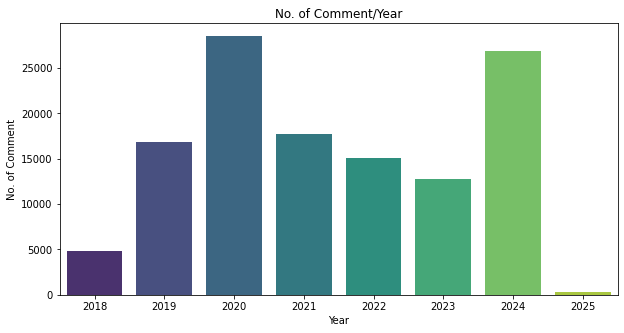

In [22]:
# data visulaization for the no. of content each year
plt.figure(figsize=(10,5))
sns.countplot(x=df['date'].dt.year, palette='viridis')
plt.title('No. of Comment/Year')
plt.xlabel('Year')
plt.ylabel('No. of Comment')
plt.show()


In [23]:
# remove emojis from the comment column
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # Chinese characters
        u"\U00002702-\U000027B0" 
        u"\U000024C2-\U0001F251" 
        u"\U0001f926-\U0001f937" 
        u"\U00010000-\U0010ffff" 
        u"\u2640-\u2642" 
        u"\u2600-\u2B55" 
        u"\u200d" 
        u"\u23cf" 
        u"\u23e9" 
        u"\u231a" 
        u"\ufe0f"  # dingbats
        u"\u3030" 
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['comment'] = df['comment'].apply(remove_emoji)

In [24]:
# remove emoticons from the comment column
emoticon_pattern = re.compile(r"""
    [:;= B]               # Eyes
    [\-']?              # Optional nose
    [\)\(DP\/\\\[\]\$\*O!]  # Mouth
""", re.VERBOSE)
df['comment'] = df.comment.apply(lambda x: emoticon_pattern.sub(r'', x))

In [25]:
# remove blank records from the comments column
def is_blank(string):
    return not string.strip()

df = df[~df['comment'].apply(is_blank)]
df

,reviewId,comment,score,date
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,"Yes I, m",5,2025-01-03 15:16:05
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet. I can...,1,2025-01-03 15:10:25
5,dfe9f50c-5a61-4a40-a32a-8a3e5729f660,I haven't been able to use Netflix on my Googl...,1,2025-01-03 14:54:07
...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it! there are so many movies and...,5,2019-08-03 15:06:03
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix. I always enjoy my time using it.,5,2022-08-15 16:16:30
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58
123858,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive.. bcos we see netflix s...,1,2019-07-21 09:41:42


In [26]:
import re
import string

# remove punctuation and numbers from the comment column
def remove_punctuation_and_numbers(text):
    """
    Removes all punctuation and numbers from the given text.
    - Uses str.translate() for punctuation removal.
    - Uses regular expression to remove numbers.
    - Handles missing (None) values by returning an empty string.
    """
    if not isinstance(text, str):  # Ensure input is a string
        return ""

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)  # Remove all digits

    return text

df['comment'] = df['comment'].apply(remove_punctuation_and_numbers)

C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_1336/1644608471.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = df['comment'].apply(remove_punctuation_and_numbers)


In [27]:
# remove blank records from the comments column
df=df[~df['comment'].apply(is_blank)]
df

,reviewId,comment,score,date
0,f1e2a08a-5c36-427f-9574-2d2c2f2d4a72,fornikite with no colombus wind daphnee,5,2025-01-03 15:21:55
1,5fef2461-0da9-47fc-8f61-6fe6ac426589,Yes I m,5,2025-01-03 15:16:05
2,8255ef9d-52ab-4981-ad59-ff869650f60e,Adds popping up during movies,1,2025-01-03 15:16:01
3,6e26402d-b74f-41df-b9a4-7a92a6a76271,App will not open on Amazon Fire Tablet I can ...,1,2025-01-03 15:10:25
5,dfe9f50c-5a61-4a40-a32a-8a3e5729f660,I havent been able to use Netflix on my Google...,1,2025-01-03 14:54:07
...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,i really like it there are so many movies and ...,5,2019-08-03 15:06:03
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,I love Netflix I always enjoy my time using it,5,2022-08-15 16:16:30
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Sound quality is very slow of movies,1,2020-08-17 07:26:58
123858,32870f7f-c461-4256-b602-75244ca60248,Rate is very expensive bcos we see netflix sun...,1,2019-07-21 09:41:42


In [28]:
# Initialize translator
from langdetect import detect
from googletrans import Translator 

translator = Translator()

def preprocess_text(text):
    try:
        lang = detect(text)
        if lang != "en":  # Translate non-English text
            text = translator.translate(text, dest="en").text
        text = text.lower().strip()  # Normalize text
        return text
    except:
        return None  # Skip problematic reviews

# Apply preprocessing
df['cleaned_review'] = df['comment'].astype(str).apply(preprocess_text)
df.dropna(subset=['cleaned_review'], inplace=True)  # Remove empty comments

print(df.head())

                               reviewId  \
0  f1e2a08a-5c36-427f-9574-2d2c2f2d4a72   
1  5fef2461-0da9-47fc-8f61-6fe6ac426589   
2  8255ef9d-52ab-4981-ad59-ff869650f60e   
3  6e26402d-b74f-41df-b9a4-7a92a6a76271   
5  dfe9f50c-5a61-4a40-a32a-8a3e5729f660   

                                             comment  score  \
0            fornikite with no colombus wind daphnee      5   
1                                            Yes I m      5   
2                      Adds popping up during movies      1   
3  App will not open on Amazon Fire Tablet I can ...      1   
5  I havent been able to use Netflix on my Google...      1   

                 date                                     cleaned_review  
0 2025-01-03 15:21:55            fornikite with no colombus wind daphnee  
1 2025-01-03 15:16:05                                            yes i m  
2 2025-01-03 15:16:01                      adds popping up during movies  
3 2025-01-03 15:10:25  app will not open on amazon fire tablet

C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_1336/1097259284.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review'] = df['comment'].astype(str).apply(preprocess_text)
C:\Users\BABLID~1\AppData\Local\Temp/ipykernel_1336/1097259284.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['cleaned_review'], inplace=True)  # Remove empty comments


In [67]:
df.sample(5)


,reviewId,comment,score,date,cleaned_review
54155,79727082-b7e4-43ed-b17c-d36582538f0f,Good app The only thing that is missing is tha...,3,2022-06-23 16:19:07,good app the only thing that is missing is tha...
20473,413babf2-abf5-41db-a60f-94714c44dde5,Edited The addition of a brightness slider is ...,5,2019-12-10 21:50:52,edited the addition of a brightness slider is ...
89844,a06ea5ff-3705-4559-8787-0d8e2629f16a,Content is awesome Theld Guardrojectower and ...,5,2020-08-15 11:05:54,content is awesome theld guardrojectower and ...
48700,b029bddc-5ee4-47b9-bc2e-fb75b8a852cc,This app is a really good app but it can somet...,5,2020-11-06 22:10:56,this app is a really good app but it can somet...
82186,7ac967ba-eb88-42db-bd09-f80fccfa8ec6,Amount deducted and still subscription is show...,1,2022-05-15 00:49:11,amount deducted and still subscription is show...


In [1]:
df.to_csv('/results/translated_text.csv')      

NameError: name 'df' is not defined